In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [7]:
matches=pd.read_csv('D:\Indian Premier League\matches.csv')
deliveries=pd.read_csv('D:\Indian Premier League\deliveries.csv')

In [9]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [11]:
matches.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

# Wins per season

In [13]:
wins_per_season = matches.groupby('season')['winner'].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

# No. of matches in each IPL season

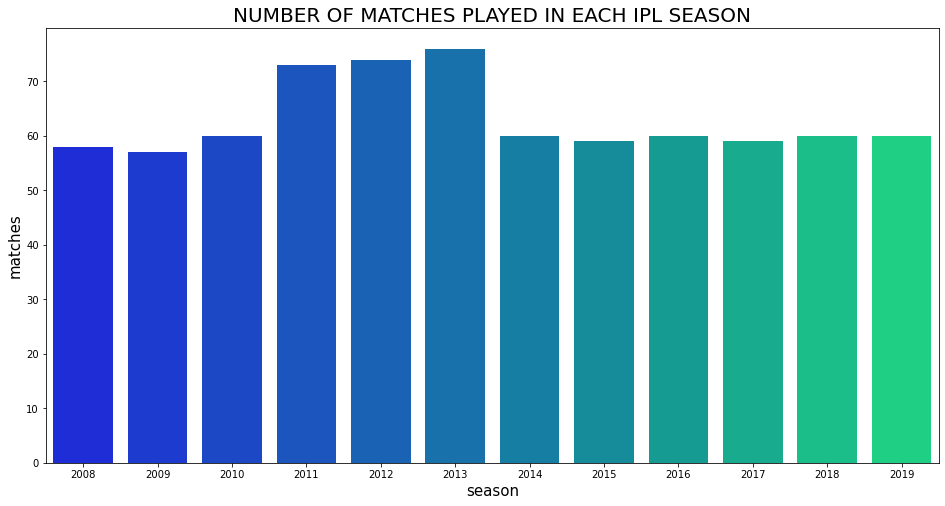

In [15]:
plt.figure(figsize=(16,8))
sn.countplot(x='season',data=matches,palette="winter")
plt.title('NUMBER OF MATCHES PLAYED IN EACH IPL SEASON', fontsize=20)
plt.xlabel('season',fontsize=15)
plt.ylabel('matches',fontsize=15)
plt.show()

# No. of matches won by each IPL team

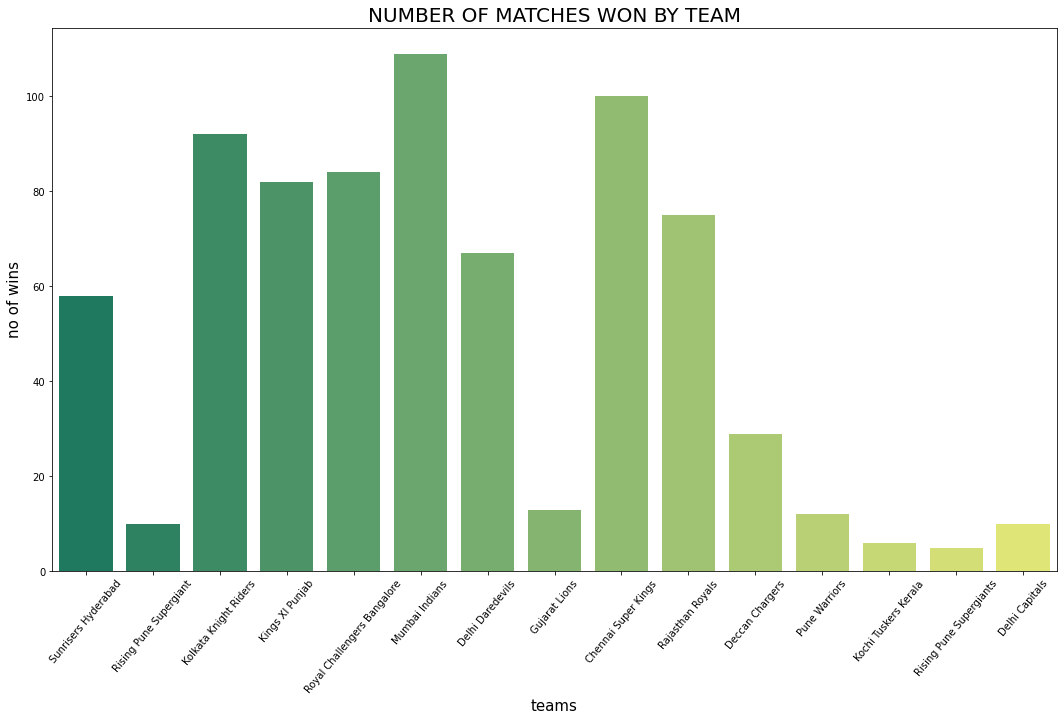

In [16]:
plt.figure(figsize=(18,10))
sn.countplot(x='winner',data=matches,palette='summer')
plt.title('NUMBER OF MATCHES WON BY TEAM',fontsize='20')
plt.xticks(rotation=50)
plt.xlabel('teams',fontsize='15')
plt.ylabel('no of wins',fontsize='15')
plt.show()

# Display Match Results

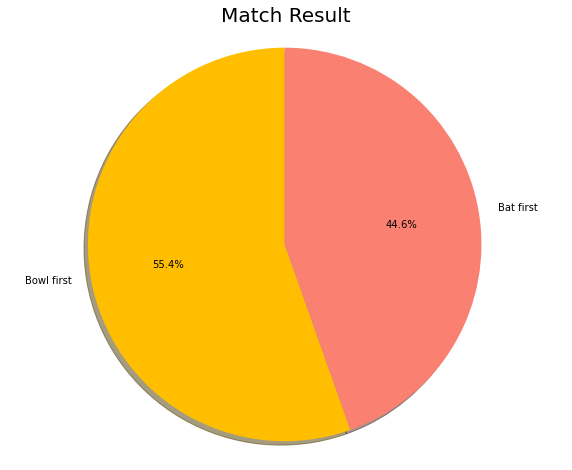

In [17]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')

Win=matches.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()


# Number of matches won by batting and bowling first

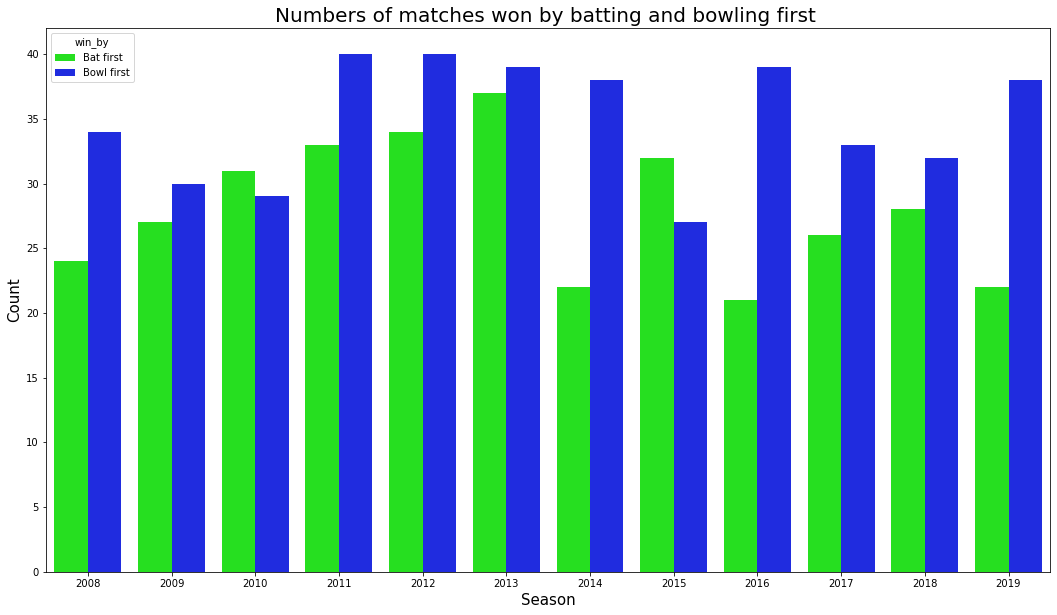

In [18]:
plt.figure(figsize = (18,10))
sn.countplot(x='season',hue='win_by',data=matches,palette='hsv')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

# Display pie chart on Toss Decision

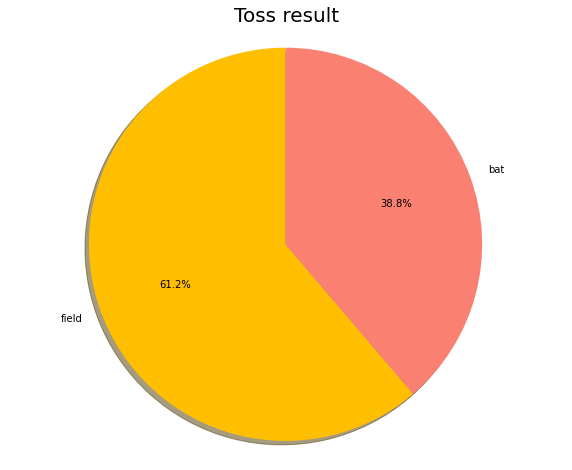

In [19]:
Toss=matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal')
plt.show()

# Display number of matches won by Toss result

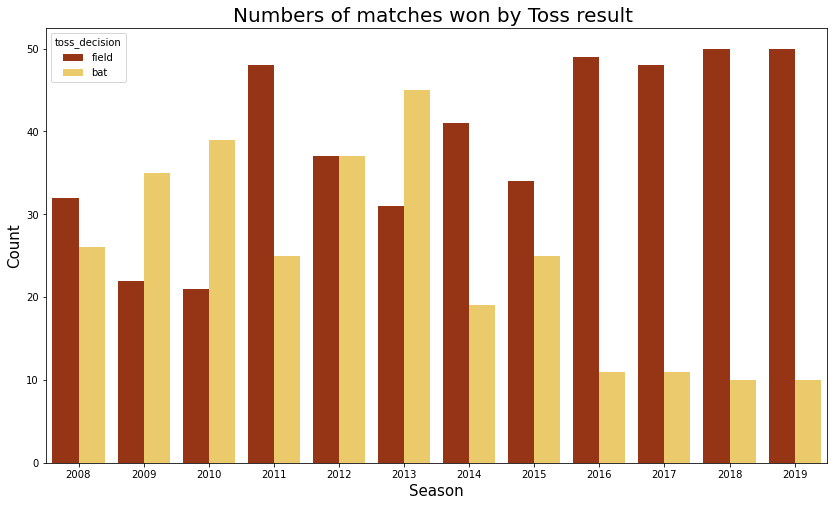

In [20]:
plt.figure(figsize = (14,8))
sn.countplot(x='season',hue='toss_decision',data=matches,palette='afmhot')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

# Winner season-wise

In [21]:
final_matches=matches.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


# Plot pie chart on winning percentage in final

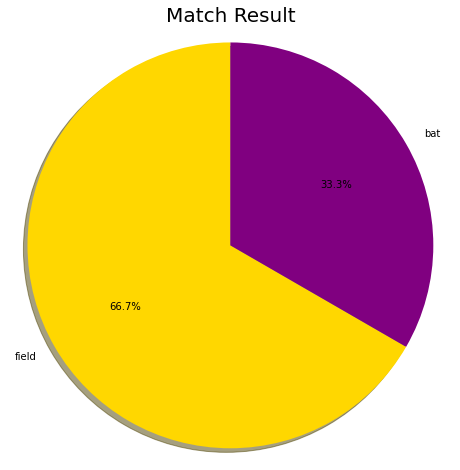

In [22]:
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors = ['gold', 'purple']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

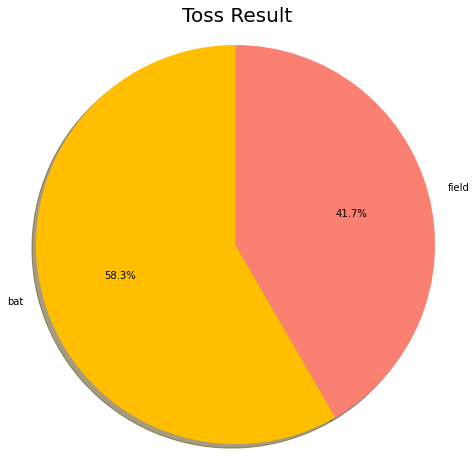

In [23]:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result',fontsize=20)
plt.axis('equal')
plt.show()

# Display the name of Top player

<Figure size 1296x720 with 0 Axes>

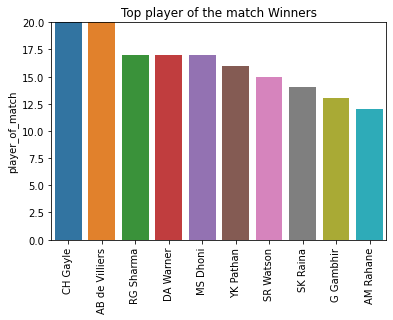

In [25]:
plt.figure(figsize = (18,10))
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sn.barplot(x = top_players.index, y = top_players, orient='v', );
plt.show()

# venues-winners-number of wins

In [26]:
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

# Number of seasons won by teams

In [27]:
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Sunrisers Hyderabad      1
Rajasthan Royals         1
Name: winner, dtype: int64

# Toss winner- Toss Decision- Winner

In [28]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


# Man of the match in finals

In [29]:
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [30]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

# Number of fours hit by team

In [31]:
season_data=matches[['id','season','winner']]
Total_data=deliveries.merge(season_data,how='inner',left_on='match_id',right_on='id')


four_data=Total_data[Total_data['batsman_runs']==4] 
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


# No. of fours hit by players

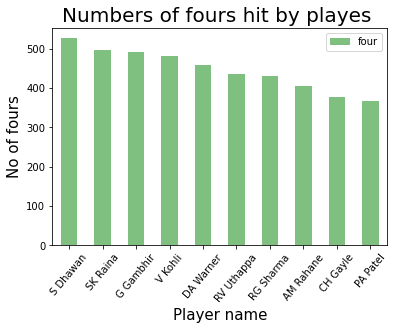

In [33]:
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='green',alpha=0.5)
plt.title("Numbers of fours hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

# Total number of fours in each season

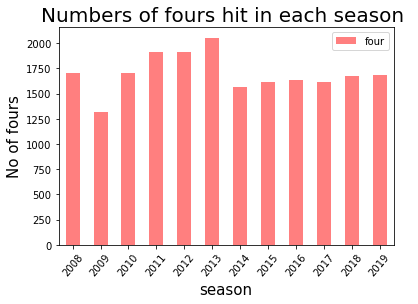

In [34]:
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'red',alpha=0.5)
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

# No. of sixes hit by a team

In [36]:
six_data=Total_data[Total_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


# No of sixes hit by players

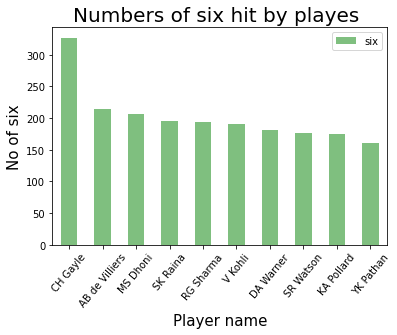

In [37]:
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='green',alpha=0.5)
plt.title("Numbers of six hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

# Total no. of sixes hit in each season

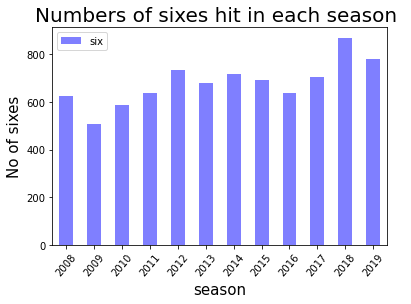

In [40]:
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'blue',alpha=0.5)
plt.title("Numbers of sixes hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of sixes",fontsize=15)
plt.show()

# Top 10 leading run scores

In [42]:
batsman_score=deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print(" Top 10 Leading Run Scorer in IPL ")
batsman_score.iloc[:10,:]

 Top 10 Leading Run Scorer in IPL 


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


# Number of matches played by batsman

In [44]:
No_Matches_player= deliveries[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(10)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137
5,G Gambhir,136
6,KD Karthik,135
7,PA Patel,126
8,AM Rahane,116
9,AT Rayudu,115


# Dismissals in IPL

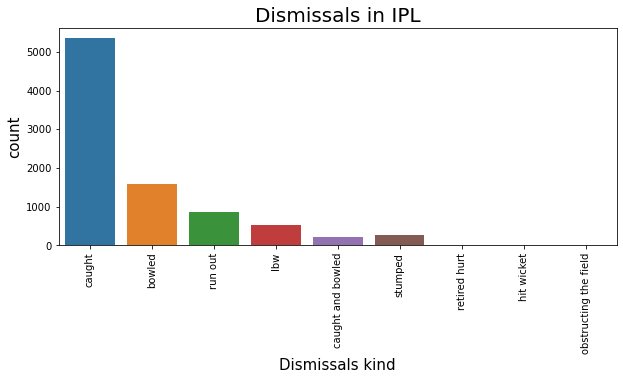

In [45]:
plt.figure(figsize=(10,4))
ax=sn.countplot(x=deliveries.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

 # Top 10 Wicket  takers

In [46]:
wicket_data=deliveries.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [47]:
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


# Conclusions :

### 1) The highest number of matches played in IPL season were in 2013,2014 and 2015.

### 2) The highest number of final matches won are by Mumbai Indians i.e 4 matches out of 12 matches.

### 3) Teams which Bowls first has higher chances of winning then the team which Bats first.

### 4) After winning toss more teams decide to do fielding first.

### 5) In finals teams which decide to do fielding first win the matches more than the team which bat first.

### 6) In finals most teams after winning toss decide to do fielding first.

### 7) Top players of winning matches are CH gayle and AB de villers.

### 8) Out of 12 IPL finals, 9 times the team that won the toss was also the winner of IPL.

### 9) The highest number of fours hit by player is Shikar Dhawan.

### 10) The highest number of sixes hit by player is CH gayle.

### 11) Top leading run scorers in IPL are Virat kholi, SK Raina, RG Sharma.

### 12) The highest number of matches played by player name are SK Raina, RG Sharma.

### 13) Dismissals in IPL was most by Catch out .

### 14) In IPL most wickets taking bowler is SL Malinga.